# Medicare Fraud Detection

### Data 698: Data Science Research Project - Spring 2019

### Student: Chunhui Zhu

Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2016.csv: https://data.cms.gov/Medicare-Physician-Supplier/Medicare-Provider-Utilization-and-Payment-Data-Phy/utc4-f9xp

LEIE2019.csv: https://oig.hhs.gov/exclusions/exclusions_list.asp

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as plt
import pickle

import matplotlib.pyplot as plt
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt


#I used the searching result of unique NPI finding in a specifit year in previous steps. 
#load Fraud unique NPI from pickle, example for 2016 yr: "fraud_df16_pickle"
#close pickle
#function returns pd df for fraud_NPI in that year
def loadfraudNPI (year):
    y=str(year)
    fraud_pkl=open("fraud_df"+str(y[2:4])+"_pickle","rb")
    fraud_NPI=pickle.load(fraud_pkl)
    print(fraud_NPI.head(5))
    print("The number of fraud NPI found in " + y +" is " + str(len(fraud_NPI)) + ".")
    fraud_pkl.close()
    return (fraud_NPI)

In [2]:
#example pickle name conver2016_pickle
def loaddf (year):
    df_pkl=open("convt_dropcolumns_"+str(year)+"_pickle","rb")
    df=pickle.load(df_pkl)
    print("finished load for convt_dropcolumns"+str(year)+"_pickle.")
    df_pkl.close()
    return (df)

In [3]:
convt_dropcolumns_2016df=loaddf(2016)
convt_dropcolumns_2015df=loaddf(2015)
convt_dropcolumns_2014df=loaddf(2014)
convt_dropcolumns_2013df=loaddf(2013)
convt_dropcolumns_2012df=loaddf(2012)

finished load for convt_dropcolumns2016_pickle.
finished load for convt_dropcolumns2015_pickle.
finished load for convt_dropcolumns2014_pickle.
finished load for convt_dropcolumns2013_pickle.
finished load for convt_dropcolumns2012_pickle.


In [4]:
#made sure it is the right data set from last process
convt_dropcolumns_2015df.head()

,npi,type,hcpcs_c,line_srvc_cnt,bene_day_srvc_cnt,avg_submitted_chrg_amt,city,state,Fraud
1,1003000126,0.0,99217,23.0,23.0,328.000000,3,2,0
2,1003000126,0.0,99219,18.0,18.0,614.000000,3,2,0
3,1003000126,0.0,99221,59.0,59.0,333.288136,3,2,0
4,1003000126,0.0,99222,132.0,132.0,356.492424,3,2,0
5,1003000126,0.0,99223,220.0,220.0,631.186364,3,2,0


## Observation - line_srvc_cnt

### 2015

C:\Users\czhu5\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


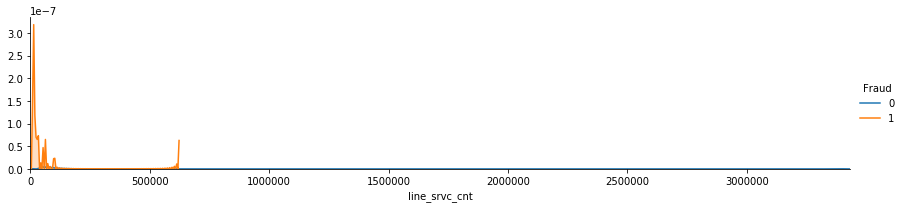

In [5]:
facet = sb.FacetGrid(convt_dropcolumns_2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2015df.line_srvc_cnt.max()))
facet.add_legend()

plt.show()

### 2014

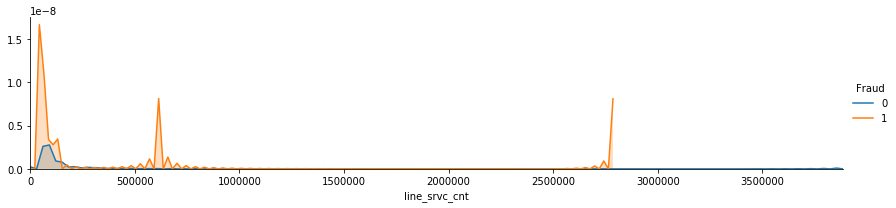

In [6]:
facet = sb.FacetGrid(convt_dropcolumns_2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2014df.line_srvc_cnt.max()))
facet.add_legend()

plt.show()

### 2013

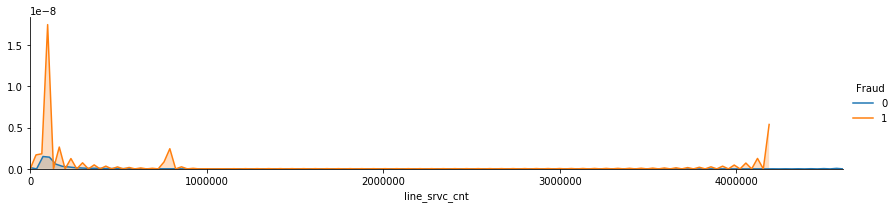

In [7]:
facet = sb.FacetGrid(convt_dropcolumns_2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2013df.line_srvc_cnt.max()))
facet.add_legend()

plt.show()

### 2012

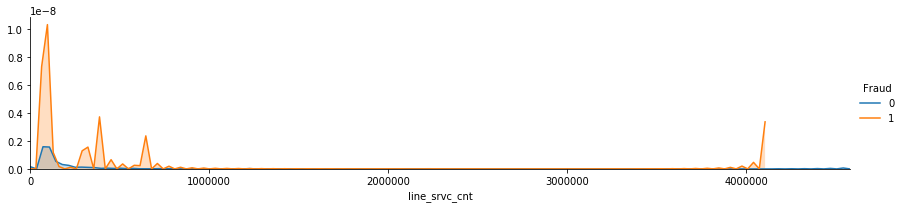

In [8]:
facet = sb.FacetGrid(convt_dropcolumns_2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2012df.line_srvc_cnt.max()))
facet.add_legend()

plt.show()

### 'line_srvc_cnt' range (0,1000000)

### 2015

(0, 1000000)

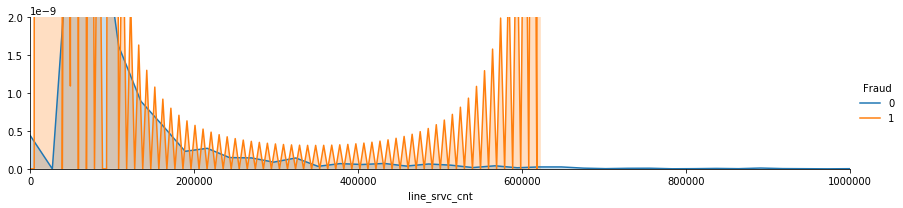

In [9]:
facet = sb.FacetGrid(convt_dropcolumns_2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2015df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000000002)
plt.xlim(0,1000000)

### 2014

(0, 1000000)

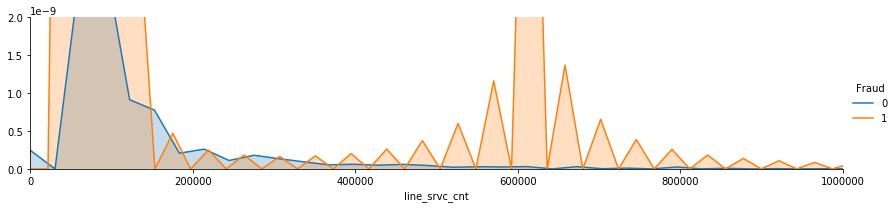

In [10]:
facet = sb.FacetGrid(convt_dropcolumns_2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2014df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000000002)
plt.xlim(0,1000000)

### 2013

(0, 1000000)

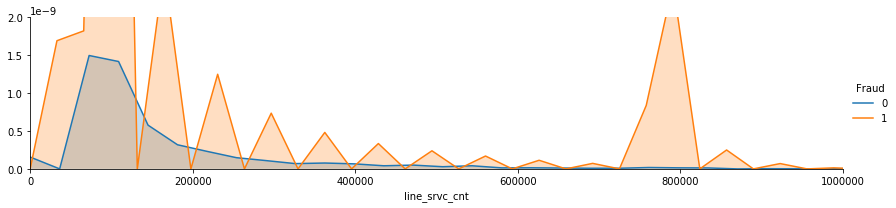

In [11]:
facet = sb.FacetGrid(convt_dropcolumns_2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2013df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000000002)
plt.xlim(0,1000000)

### 2012

(0, 1000000)

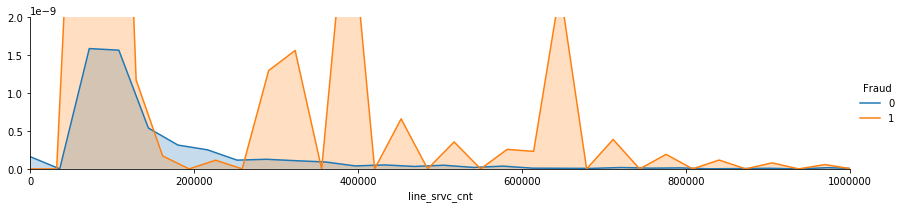

In [12]:
facet = sb.FacetGrid(convt_dropcolumns_2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2012df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000000002)
plt.xlim(0,1000000)

### 'line_srvc_cnt' rang (2500000,4500000)

### 2015

(2500000, 4500000)

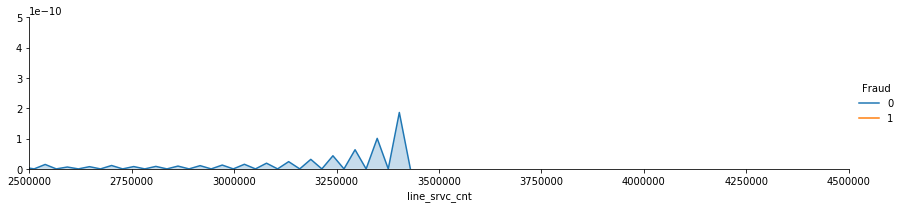

In [15]:
facet = sb.FacetGrid(convt_dropcolumns_2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2015df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.0000000005)
plt.xlim(2500000,4500000)

### 2014

(2500000, 4500000)

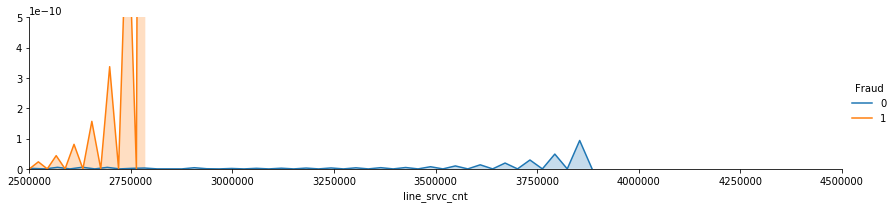

In [17]:
facet = sb.FacetGrid(convt_dropcolumns_2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2014df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.0000000005)
plt.xlim(2500000,4500000)

### 2013

(2500000, 4500000)

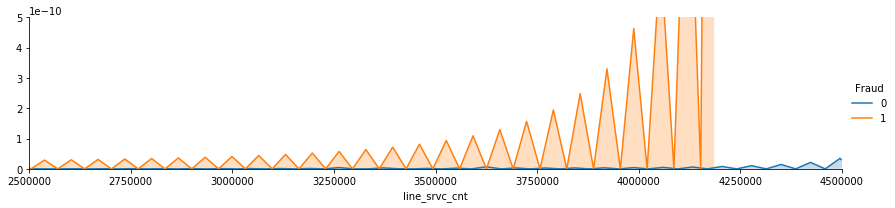

In [18]:
facet = sb.FacetGrid(convt_dropcolumns_2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2013df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.0000000005)
plt.xlim(2500000,4500000)

### 2012

(2500000, 4500000)

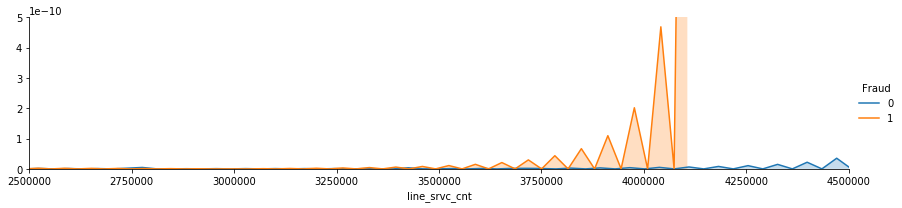

In [19]:
facet = sb.FacetGrid(convt_dropcolumns_2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2012df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.0000000005)
plt.xlim(2500000,4500000)

## Observation - bene_day_srvc_cnt	

### 2015

(0, 1200000)

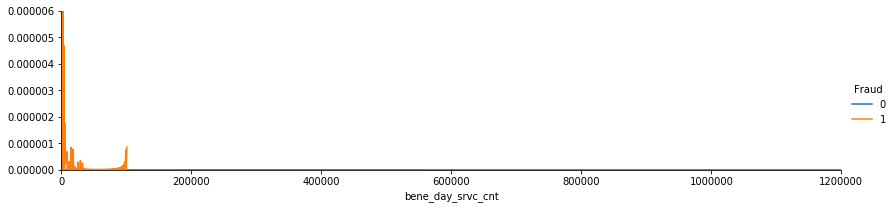

In [20]:
facet = sb.FacetGrid(convt_dropcolumns_2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2015df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000006)
plt.xlim(0,1200000)

### 2014

(0, 1200000)

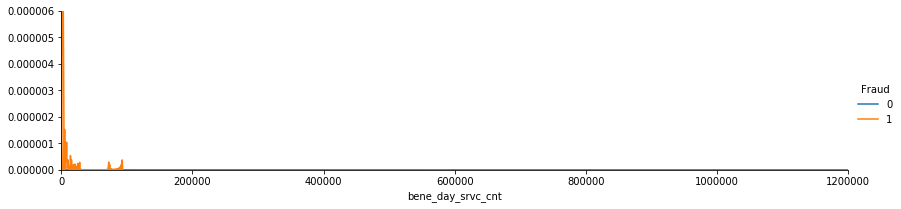

In [21]:
facet = sb.FacetGrid(convt_dropcolumns_2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2014df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000006)
plt.xlim(0,1200000)

### 2013

(0, 1200000)

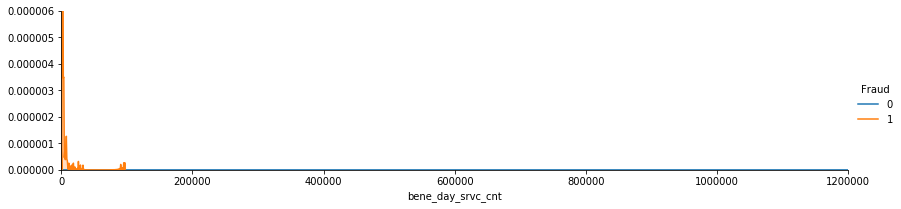

In [22]:
facet = sb.FacetGrid(convt_dropcolumns_2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2013df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000006)
plt.xlim(0,1200000)

### 2012

(0, 1200000)

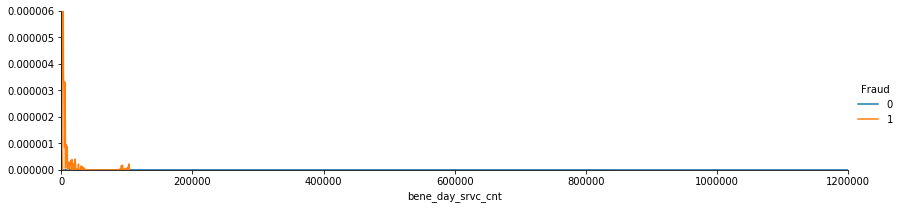

In [23]:
facet = sb.FacetGrid(convt_dropcolumns_2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2012df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000006)
plt.xlim(0,1200000)

### 'bene_day_srvc_cnt' rang (0,120000)

### 2015

(0, 120000)

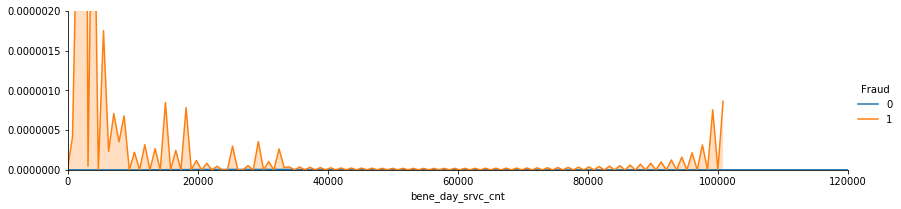

In [24]:
facet = sb.FacetGrid(convt_dropcolumns_2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2015df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000002)
plt.xlim(0,120000)

### 2014

(0, 120000)

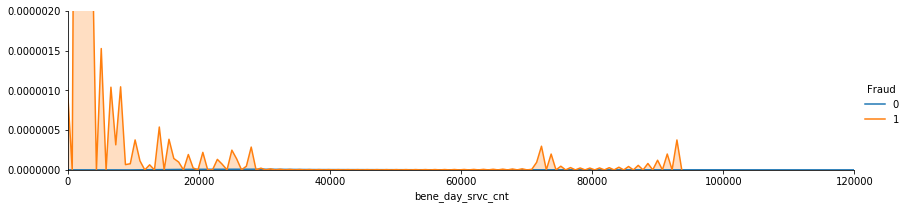

In [25]:
facet = sb.FacetGrid(convt_dropcolumns_2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2014df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000002)
plt.xlim(0,120000)

### 2013

(0, 120000)

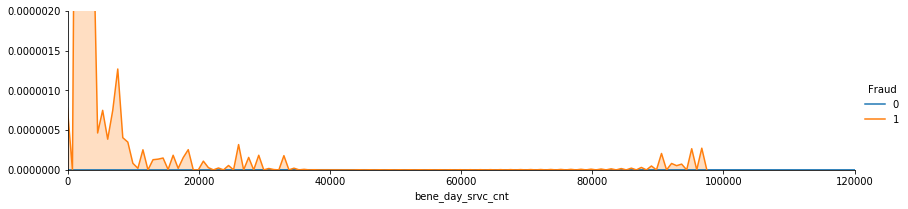

In [26]:
facet = sb.FacetGrid(convt_dropcolumns_2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2013df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000002)
plt.xlim(0,120000)

### 2012

(0, 120000)

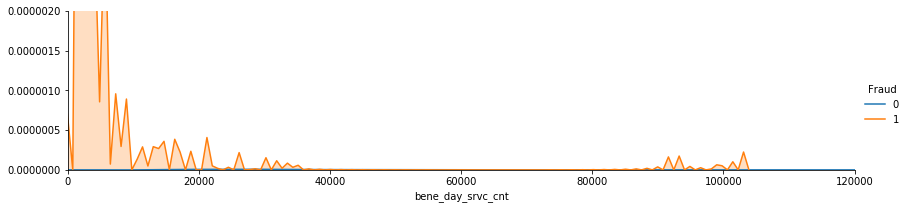

In [27]:
facet = sb.FacetGrid(convt_dropcolumns_2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2012df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000002)
plt.xlim(0,120000)

## Observation - avg_submitted_chrg_amt

### 2015

(0, 80000)

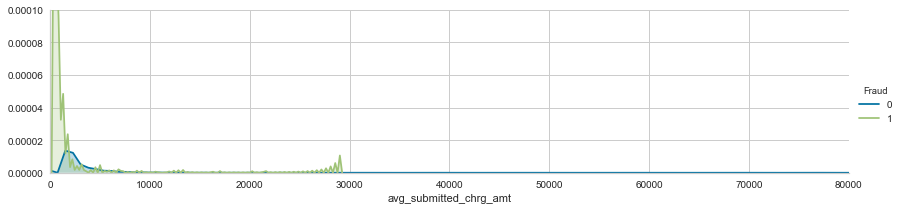

In [165]:
facet = sb.FacetGrid(convt_dropcolumns_2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2015df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.0001)
plt.xlim(0,80000)

### 2014

(0, 80000)

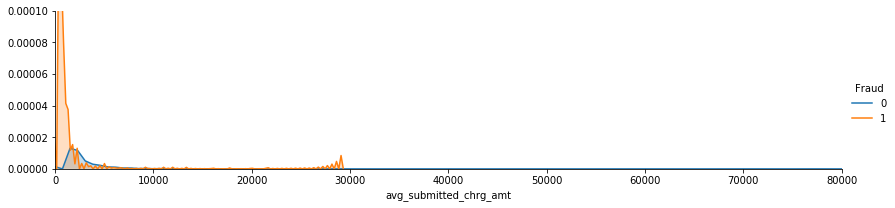

In [28]:
facet = sb.FacetGrid(convt_dropcolumns_2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2014df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.0001)
plt.xlim(0,80000)

### 2013

(0, 80000)

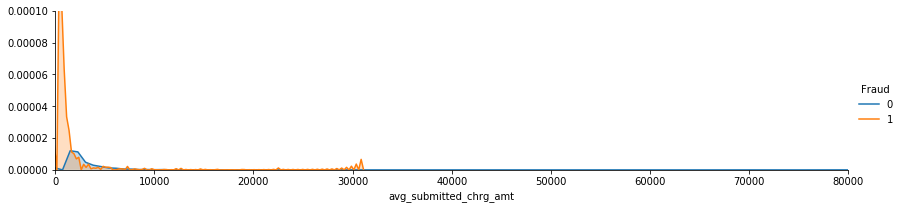

In [29]:
facet = sb.FacetGrid(convt_dropcolumns_2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2013df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.0001)
plt.xlim(0,80000)

### 2012

(0, 80000)

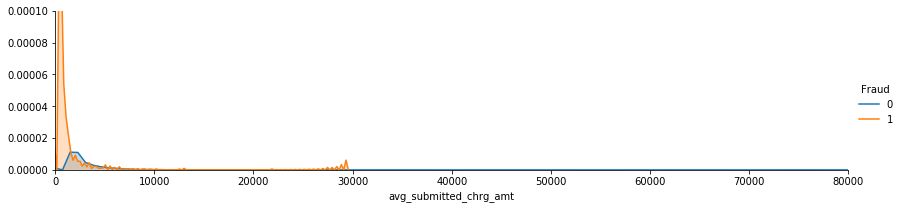

In [30]:
facet = sb.FacetGrid(convt_dropcolumns_2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2012df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.0001)
plt.xlim(0,80000)

### 'avg_submitted_chrg_amt' rang (0,30000)

### 2015

(0, 30000)

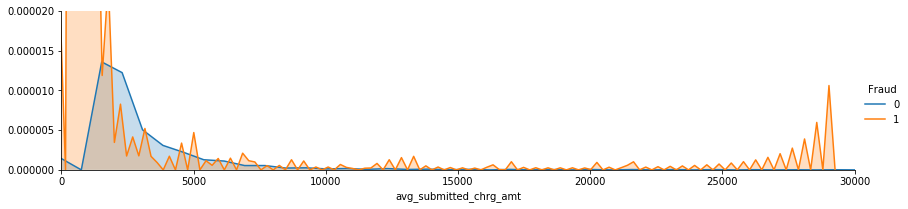

In [31]:
facet = sb.FacetGrid(convt_dropcolumns_2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2015df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.00002)
plt.xlim(0,30000)

### 2014

(0, 30000)

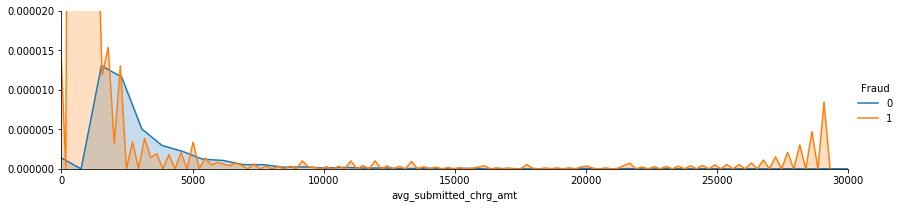

In [32]:
facet = sb.FacetGrid(convt_dropcolumns_2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2014df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.00002)
plt.xlim(0,30000)

### 2013

(0, 30000)

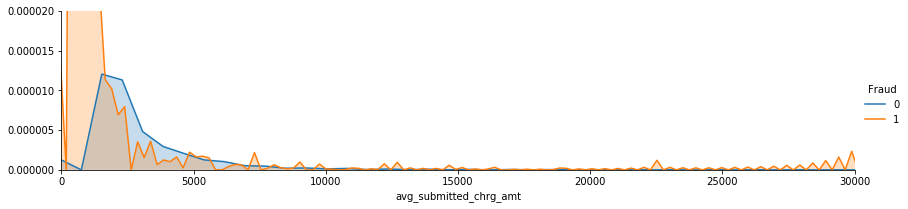

In [33]:
facet = sb.FacetGrid(convt_dropcolumns_2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2013df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.00002)
plt.xlim(0,30000)

### 2012

(0, 30000)

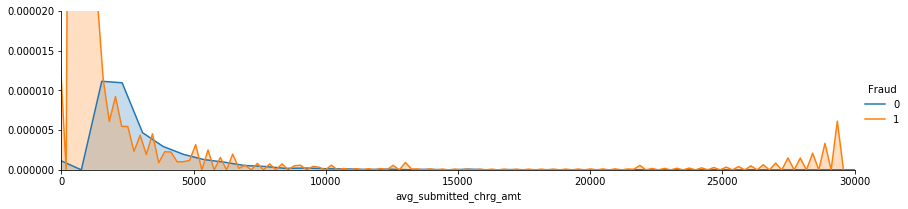

In [34]:
facet = sb.FacetGrid(convt_dropcolumns_2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt_dropcolumns_2012df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.00002)
plt.xlim(0,30000)